In [1]:
import pandas as pd

In [2]:
df_fruit = pd.read_excel('fruit.xlsx')

In [3]:
df_fruit

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit


In [4]:
df_fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [5]:
df_fruit.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [6]:
print(df_fruit.columns)  

Index(['diameter', 'weight', 'red', 'green', 'blue', 'name'], dtype='object')


In [7]:
pd.unique(df_fruit['name'])

array(['orange', 'grapefruit'], dtype=object)

In [8]:
(df_fruit['name']).value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

In [9]:
df_fruit.iloc[:, :-1]

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9
...,...,...,...,...,...
9995,15.35,253.89,149,77,20
9996,15.41,254.67,148,68,7
9997,15.59,256.50,168,82,20
9998,15.92,260.14,142,72,11


In [10]:
x = df_fruit.iloc[:, :-1].values  # Semua baris dan semua kolom kecuali kolom terakhir (independent variables)
y = df_fruit.iloc[:, -1].values  # Semua baris dan hanya kolom terakhir (dependent variable)

In [11]:
y = y.reshape(len(y),)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean').fit(x_train, y_train)
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [16]:
y_pred = knn.predict(x_test)

In [17]:
y_pred

array(['grapefruit', 'orange', 'orange', ..., 'grapefruit', 'orange',
       'grapefruit'], dtype=object)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [19]:
print("Nilai Akurasi", accuracy_score(y_test,y_pred))

Nilai Akurasi 0.913


              precision    recall  f1-score   support

  grapefruit       0.91      0.92      0.91      1012
      orange       0.91      0.91      0.91       988

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



<Axes: >

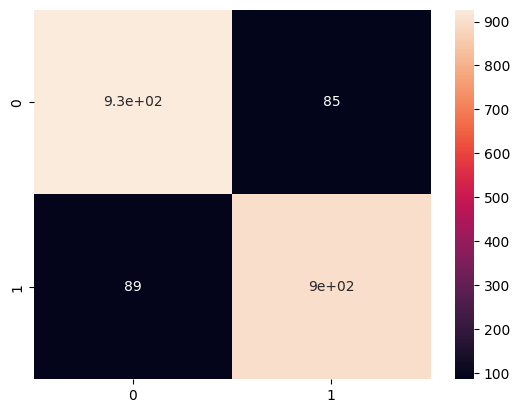

In [20]:
print(classification_report(y_test,y_pred))
sb.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [21]:
n_akurasi = []
for k in range (1,100):
     knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean').fit(x_train, y_train)
     y_prediksi = knn.predict(x_test)
     Akurasi = accuracy_score(y_test,y_pred)
     n_akurasi.append(Akurasi)
print(n_akurasi)

[0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913]


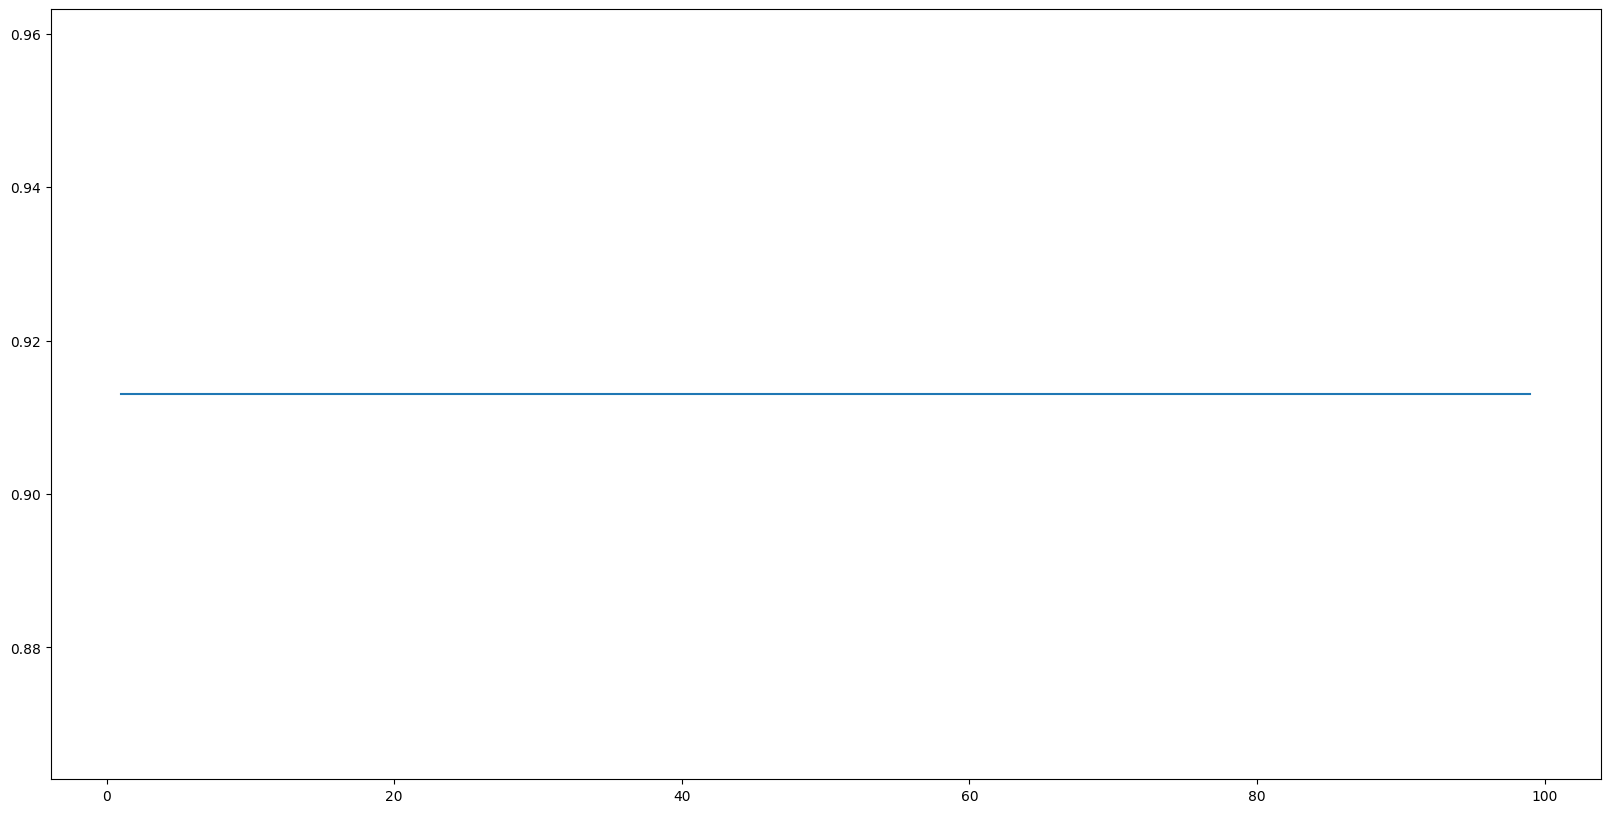

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(range (1,100),n_akurasi)
plt.show()

In [23]:
new_data = [
    [2.86, 100.0, 167, 87, 3],
    [3.23, 87.34, 176, 89, 2],
    [2.45, 98.76, 189, 78, 3],  
    [3.71, 97.1, 188, 76, 2],
    [2.98, 67.12, 198, 97, 3]
]
new_pred = knn.predict(new_data)
print(new_pred)


['grapefruit' 'grapefruit' 'grapefruit' 'grapefruit' 'orange']


In [24]:
import pickle

In [25]:
filename = 'fruit_model.pkl'
pickle.dump(knn, open(filename, 'wb'))

print("Model KNN berhasil disimpan!")

Model KNN berhasil disimpan!
